In [1]:
import random
import math
import matplotlib.pyplot as plt


# Example height categories (bin centres in cm) and counts
excats      = [150, 160, 170, 180, 190, 200, 210]
excounts    = [ 10,  20,  60,  70,  60,  20,  10]
excatcounts = dict(zip(excats, excounts))


# Show example distribution
def explot():

    print("Example category counts:", excatcounts)
    plot_dist(category_counts, title="Example Categorical Distribution", \
              xlabel="Height bin (cm)")


# General plotting function
def plot_dist(d, title="", xlabel="", ylabel="Count"):

    keys = sorted(d.keys())
    values = [d[k] for k in keys]
    plt.bar(keys, values, width=5, align='center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    
# cprob(catcounts)
#   Compute cumulative probability thresholds.
def cprob(catcounts):

    csum = 0
    bounds = {}
    
    total = sum(catcounts.values())
    
    for key, count in catcounts.items():
        csum += count / total
        bounds[key] = csum
        
    return bounds


# draw(nr, catcounts)
#    Draw nr of elements according to probability bounds.
def draw(nr, catcounts):
    
    samp = {cat: 0 for cat in catcounts}  # Initialise counts to 0
    bounds = cprob(catcounts)             # Compute cumulative probabilities once

    for p in [random.uniform(0,1) for _ in range(nr)]:
        for cat, bound in bounds.items():
            if p <= bound:
                samp[cat] += 1
                break

    return samp


# rndints(nr, lo, hi)
#   Generate nr of random integers between given lo and hi. UNIFORM DISTRIBUTION
def rndints(nr, lo, hi):

    res = []

    for n in range(0, nr):
        res.append(random.randint(lo, hi))

    return res


# bin(vals, width)
#   Bin a list of numbers to the nearest number according to width.
def bin(vals, width):

    return [width * round(v/width) for v in vals]


# freqs(L)
#   Make a sorted counts dictionary for a list of values.
def freqs(L):

    S = sorted(L)
    T = sorted(list(set(S)))
    C = [S.count(t) for t in T]

    return dict(zip(T, C))


In [4]:
sum_excounts = sum(excounts)
sum_excounts

250

In [10]:
n_samples = 20000
balls_indices = rndints(n_samples, 0, sum_excounts-1) # -1 because index is 0-based

In [11]:
# count-bins flipping/sampling algorithm
samples = []
for ball_index in balls_indices: # this is our samples
    acc = 0 # accumulation
    for excat, excount in zip(excats, excounts): # to list of tuples, and then again exploded into the two variables
        acc = acc + excount # accumulation to determine the bin it falls into
        if ball_index < acc: # determination
            samples.append(excat) # add sample to list of samples
            break # break inner loop and proces next ball index

In [21]:
# count the samples by category and make the dictionary of this
sampled_counts_dict = {cat: 0 for cat in excats}
for sample in samples:
    sampled_counts_dict[sample] += 1

In [22]:
sampled_counts_dict

{150: 787, 160: 1585, 170: 4765, 180: 5632, 190: 4843, 200: 1578, 210: 810}

In [26]:
# data format into a list (without categories stated here) because plt.bar doesn't like dictionaries
sampled_counts_list = [sampled_counts_dict[cat] for cat in excats]
sampled_counts_list

[787, 1585, 4765, 5632, 4843, 1578, 810]

<BarContainer object of 7 artists>

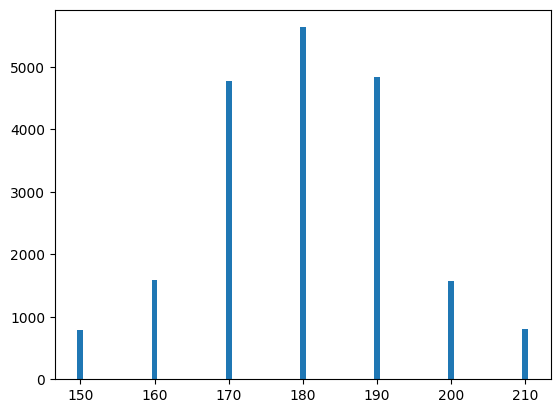

In [28]:
plt.bar(excats, sampled_counts_list) # first argument is x axis (categories) and second argument is y axis (counts of category)